# HW5 Logistic Regression
# Credit Default Risks and Effect of Ads


### 1. Evaluation of credit default risks with logistic regression
Imagine that you work at a credit departent of a bank. A succesfull start-up is applying for a short-term credit at your bank and your task is to evaluate the corresponding credit default risk (we assume it is enough to simply predict the most likely outcome: Default/No default)

#### 1.1 Data.

You are given the data for credit defaults of comparable start-ups in the past: for each start-up you have return on total assets (%) and liqudity ratio (current ratio,%). Data is given in creditRisk.csv. Read the data with pandas. Create a scatter plot of the data with two finacial indicators along the axes and with positive and negative examples represented by different markers. 

Based on visual inspection of the data formulate a hypothesis: what start-ups are more likely to default on their dept. 

Build X and Y matrices for the estimation.

#### 1.2 Estimation
Implemet the following functions: sigmoid(x), where x can be a vector; loss function J(theta, X,Y) and derivative d_J(theta, X, Y).

Minimize the loss function using the build-in optimization routine https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize. Note that you might need to install the SciPy package first. SciPy minimize essentially performs a (fancier) version of the GD that you have implemented in one of the last HWs. The optimization result will be saved in an object (res in the code below), optimized parameters can be found in res.x.


#### 1.3 Model evaluation
Compute the model accuracy on the train set, i.e. compute the share of the examples in the data that would be correctly classified by the trained model. 

Plot the data scatter again and add the decision boundary.

Comment on 1) how good the model fits the data and 2) whether your hypothesis was confirmed.


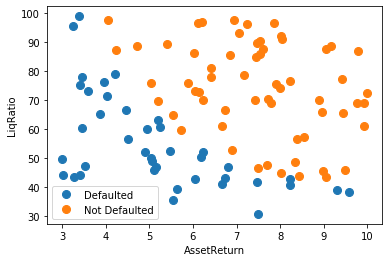

Looking at the plot we see that the defaulting Start-Ups are neatly all located in the lower left. 
A sensible conclusion would be that both low liquidation ratio and low asset return contribute to defaulting.

The optimized values are [25.16138798 -2.0623216  -0.20147204].
The function classified 89 out of 100 instances correctly. That is 89%!


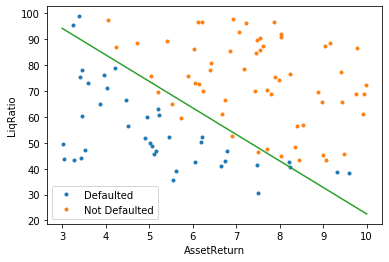

The model is a good choice for the data. There are probalbly models with better accuracy, but these increase 
the computational cost with diminishing returns on accuracy. Our initial intuition proves correct.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.optimize import minimize

Data = pd.read_csv('creditRisk.csv')

asset_default = []
liq_default = []
asset_returned = []
liq_returned = []


for k in range(len(Data['Default'])):
    
    if Data['Default'][k] == True:
        
        asset_default.append(Data['AssetReturn'][k])
        liq_default.append(Data['LiqRatio'][k])
        
    else:
        
        asset_returned.append(Data['AssetReturn'][k])
        liq_returned.append(Data['LiqRatio'][k])
                
fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot(asset_default, liq_default, marker = 'o', linestyle = '', ms = 8, label = 'Defaulted')
ax.plot(asset_returned, liq_returned, marker = 'o', linestyle = '', ms = 8, label = 'Not Defaulted')
ax.set_xlabel('AssetReturn')
ax.set_ylabel('LiqRatio')
ax.legend()
plt.show()

print('Looking at the plot we see that the defaulting Start-Ups are neatly all located in the lower left.',
      '\nA sensible conclusion would be that both low liquidation ratio and low asset return contribute to defaulting.\n')

X = np.array(list(zip(Data['AssetReturn'], Data['LiqRatio']))) 
Y = np.array(Data['Default'])

"""
Excercise 1.2

functions
"""

def sigmoid(x):
    
    if type(x) == list:
        
        return 1/(1 + np.exp(-sum(x)))
    
    else:
        return 1/(1 + np.exp(-x))

def J(theta, X, Y):
    
    m = len(Y)
    temp = 0
    
    for k in range(m):
        
        f_theta = sigmoid([theta[0], theta[1]*X[k][0], theta[2]*X[k][1]])
        temp += Y[k]*np.log(f_theta) + (1 - Y[k])*np.log(1- f_theta)
        
    return -1/m*temp

# derivative of J in direction theta_i. i is optional and defaults to 0
def d_J(theta, X, Y, i = 0):
    
    m = len(Y)
    temp = 0
    
    for k in range(m):
        
        f_theta = sigmoid([theta[0] + theta[1]*X[k][0] + theta[2]*X[k][1]])
        temp += (f_theta - Y[k])*X[k][i]
        
    return 1/m*temp

theta_0 = [0, 0, 0]

res = minimize(J, theta_0, args=(X, Y))

print(f'The optimized values are {res.x}.')

correct_class_counter = 0

for k in range(len(Y)):
    
    if Y[k] == int(round(sigmoid([res.x[0], res.x[1]*X[k][0], res.x[2]*X[k][1]]))):
        
        correct_class_counter += 1

print(f'The function classified {correct_class_counter} out of 100 instances correctly. That is 89%!')

x_coordinates = np.linspace(3, 10, 100)
y_coordiantes = [(-res.x[0]-res.x[1]*k)/res.x[2] for k in x_coordinates]

fig, ax = plt.subplots()
#ax.margins(0.05)
ax.plot(asset_default, liq_default, marker = 'o', linestyle = '', ms = 3, label = 'Defaulted')
ax.plot(asset_returned, liq_returned, marker = 'o', linestyle = '', ms = 3, label = 'Not Defaulted')
ax.plot(x_coordinates, y_coordiantes)
ax.set_xlabel('AssetReturn')
ax.set_ylabel('LiqRatio')
ax.legend()
plt.show()

print('The model is a good choice for the data. There are probalbly models with better accuracy, but these increase',
     '\nthe computational cost with diminishing returns on accuracy. Our initial intuition proves correct.')

### 2. Effect of ads with regularized logistic regression. 
Imagine that an online shop runs an experiment. During the first week it shows to all its logged-in visitors a couple of ads per day. During the second week it changes the duration and the number of ads shown to the same users. The change is different for different users. You are given the data on the differences in the average amount of ads per day and average ad duration between these two weeks for each customer as well as an indicator if the customer eventually bought anything in the second week. The task is to predict if the user buys the product or not based on the change in the ad exposure. 

#### 2.1 Read the data.
Data is given in the ads.csv file. Read the data. Create a scatter plot of the data with two measurements of the change in the ad exposure along the axes and with positive and negative examples represented by different markers. 

Based on visual inspection of the data formulate a hypothesis: how does the customers respond to the increase or decrease in the amount of ads or ad duration. What is the fundumental difference between this data set and the data from the Ex. 1

Build X and Y matrices for the estimation.

#### 2.2 Creating features
To fit the data better it might be necessary to use a polynomial model. Write a function that creates a feature vector for each ($x_1$, $x_2$): 

$[1; x_1; x_1^2; x_1^3, ....x_1^6; x_2; x_2^2; ....x_2^6;, x_1x_2; x_1^2x_2;...;x_1^5x_2],$ 

i.e. all polynomials of x1 and x2 up to the 6th order, including interaction terms. There will be 28 features in total (incl. the 1s).
#### 2.3. Estimation
More features allow us to build a more sophisticated model. However, such a model is likey to suffer from over-fitting. We would thus use a regularized version of logistic regression.

Implement the following functions: a loss function for regularized logisitc regression J(theta, X,Y, lambd) (remember that $\theta_0$ is not regularized) and the gradient d_J(theta, X, Y, lambd). As in the Ex.1 minimize the loss function using the SciPy minimize. Set the regularization parameter to 1.

#### 2.4. Model evaluation.
Evaluate the model accuracy and plot the decision boundary. You can use loops or numpy.meshgrid() to compute the decision boundary. Comment on how well the model is able to separate positive and negative examples. Can you suggest a different way of reducing over-fitting other than regularization?



#### 2.4. Sensitivity Analysis
Try different values for the regularization parameter lambda = 0, 1, 10, 100. Comment on the resulting model performance.

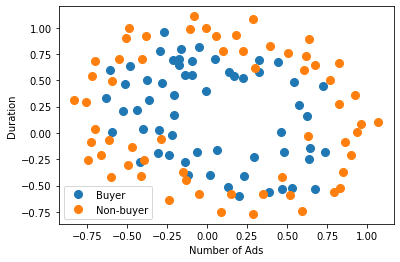

As expected longer exposure and more numerous exposure to ads initially leads to a higher number of buyers, 
but in both measurements there are overexposure effects, where customers are less likely to buy once they have 
seen too many or too long ads. The main difference to the first dataset is that the groups can not be seperated 
by a line. Insted the buyers are lumped in the center, with non-buyers in a circle around them.

The function classified 96 out of 118 instances correctly. That is about 81.36 %!


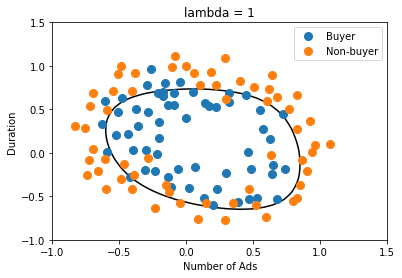

The model seperates the data quite well, given that the data is quite difficult to seperate to begin with. 
Another way of reducing overfitting is to stop the optimization early, or take a Monte Carlo approach instead.

Now for the other lambda values:


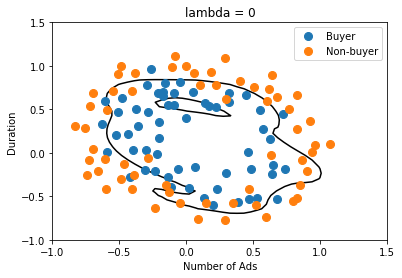


The function classified 106 out of 118 instances correctly. That is about 0.8983050847457628 %! 
The seperation is very good, but the model convergance is very slow and takes considerable time!


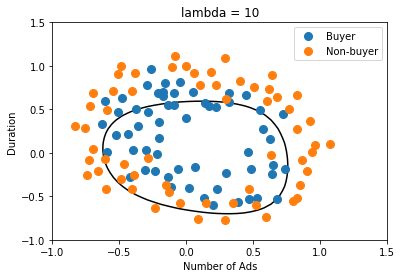


The function classified 88 out of 118 instances correctly. That is about 0.7457627118644068 %! 
The convergance is fast, but the accuracy also suffers.


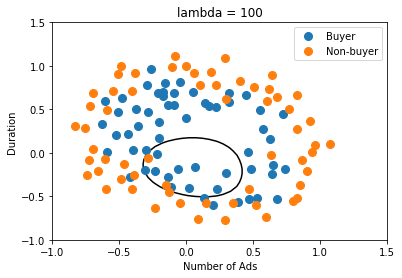


The function classified 71 out of 118 instances correctly. That is about 0.6016949152542372 %! 
The convergence is very fast, but the accuracy is just slightly better than random not really useful.


In [2]:
Data = pd.read_csv('ads.csv')
d_nb_true   = []
d_dur_true  = []
d_nb_false  = []
d_dur_false = []

for k in range(len(Data['decision'])):
    
    if Data['decision'][k] == True:
 
        d_nb_true.append(Data['d_nb'][k])
        d_dur_true.append(Data['d_dur'][k])
        
    else:
        
        d_nb_false.append(Data['d_nb'][k])
        d_dur_false.append(Data['d_dur'][k])
        
fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot(d_nb_true, d_dur_true, marker = 'o', linestyle = '', ms = 8, label = 'Buyer')
ax.plot(d_nb_false, d_dur_false, marker = 'o', linestyle = '', ms = 8, label = 'Non-buyer')
ax.set_xlabel('Number of Ads')
ax.set_ylabel('Duration')
ax.legend()
plt.show()

print('As expected longer exposure and more numerous exposure to ads initially leads to a higher number of buyers,',
     '\nbut in both measurements there are overexposure effects, where customers are less likely to buy once they have',
     '\nseen too many or too long ads. The main difference to the first dataset is that the groups can not be seperated',
     '\nby a line. Insted the buyers are lumped in the center, with non-buyers in a circle around them.')

X = np.array(list(zip(Data['d_nb'], Data['d_dur'])))
Y = np.array(Data['decision'])

def feature_vector(x_1, x_2):
    
    x_components = [x_1**k for k in range(7)]
    y_components = [x_2**k for k in range(7)]
    
    A = np.outer(x_components, y_components)
    poly = []
    
    for i in range(7):
        
        for j in range(7):
            
            if i + j < 7:
                
                poly.append(A[i,j])

    return poly

def J_new(theta, X, Y, lambd):
    
    m = len(Y)
    n = len(theta)
    temp = 0
    
    for k in range(m): 
        f_theta = sigmoid(np.dot(theta, feature_vector(X[k][0],X[k][1])))
        temp += Y[k]*np.log(f_theta) + (1 - Y[k])*np.log(1- f_theta)
    
    temp = -1/m * temp + lambd/(2*m)*sum([theta[k]**2 for k in range(n)])
        
    return temp

def d_J_new(theta, X, Y, lambd , i=0):
    
    m = len(Y)
    n = len(theta)
    temp = 0
    
    if  i == 0: 
        for k in range(m):
        
            f_theta = sigmoid(np.dot(theta, feature_vector(X[k][0],X[k][1])))
            temp += (f_theta - Y[k])*X[k][i]
            
        temp = 1/m * temp
        
    else:
        
        for k in range(m):
        
            f_theta = sigmoid(np.dot(theta, feature_vector(X[k][0],X[k][1])))
            temp += (f_theta - Y[k])*X[k][i]    
            
        temp = 1/m * temp + lambd/m * sum(theta[k] for k in range(n))
        
    return temp

theta_0 = np.zeros(28)

res = minimize(J_new, theta_0, args = (X, Y, 1)) 

#print(res.x)

correct_class_counter = 0

for k in range(len(Y)):
    
    if Y[k] == int(round(sigmoid(np.dot(res.x, feature_vector(X[k][0], X[k][1]))))):
        
        correct_class_counter += 1

print(f'\nThe function classified {correct_class_counter} out of 118 instances correctly. That is about 81.36 %!')

def DecisionBoundary(theta, axes, n = 50):

    a = np.linspace(-1, 1.5, n)
    b = np.linspace(-1, 1.5, n)
    A,B = np.meshgrid(a,b)

    A = np.ravel(A)
    B = np.ravel(B)
    C = np.zeros((n,n))
    
    #For each a,b combination create polynomial features and evaluate decision boundary
    for i in range(n):
        for j in range(n):
            
            C[i,j] = np.dot(theta, feature_vector(a[i],b[j]))
    #X = feature_vector()
    #C = 0#code here...
    
    # reshape U, V, Z back to matrix
    A = A.reshape([n, n])
    B = B.reshape([n, n])
    C = C.reshape([n, n])
    
    dec_bound_plot = axes.contour(A,B,C,levels=[0],cmap= "Greys_r")
    return dec_bound_plot

#plot the boundary
fig, ax = plt.subplots();
DecisionBoundary(res.x, ax)
ax.margins(0.05)
ax.plot(d_nb_true, d_dur_true, marker = 'o', linestyle = '', ms = 8, label = 'Buyer')
ax.plot(d_nb_false, d_dur_false, marker = 'o', linestyle = '', ms = 8, label = 'Non-buyer')
ax.set_xlabel('Number of Ads')
ax.set_ylabel('Duration')
ax.legend()
ax.set_title('lambda = 1')
plt.show()

print('The model seperates the data quite well, given that the data is quite difficult to seperate to begin with.',
     '\nAnother way of reducing overfitting is to stop the optimization early, or take a Monte Carlo approach instead.')

print('\nNow for the other lambda values:')

res = minimize(J_new, theta_0, args = (X, Y, 0)) 
fig, ax = plt.subplots();
DecisionBoundary(res.x, ax)
ax.margins(0.05)
ax.plot(d_nb_true, d_dur_true, marker = 'o', linestyle = '', ms = 8, label = 'Buyer')
ax.plot(d_nb_false, d_dur_false, marker = 'o', linestyle = '', ms = 8, label = 'Non-buyer')
ax.set_xlabel('Number of Ads')
ax.set_ylabel('Duration')
ax.legend()
ax.set_title('lambda = 0')
plt.show()

correct_class_counter = 0

for k in range(len(Y)):
    
    if Y[k] == int(round(sigmoid(np.dot(res.x, feature_vector(X[k][0], X[k][1]))))):
        
        correct_class_counter += 1

percent = correct_class_counter/118
print(f'\nThe function classified {correct_class_counter} out of 118 instances correctly. That is about {percent} %!',
     '\nThe seperation is very good, but the model convergance is very slow and takes considerable time!')

res = minimize(J_new, theta_0, args = (X, Y, 10)) 
fig, ax = plt.subplots();
DecisionBoundary(res.x, ax)
ax.margins(0.05)
ax.plot(d_nb_true, d_dur_true, marker = 'o', linestyle = '', ms = 8, label = 'Buyer')
ax.plot(d_nb_false, d_dur_false, marker = 'o', linestyle = '', ms = 8, label = 'Non-buyer')
ax.set_xlabel('Number of Ads')
ax.set_ylabel('Duration')
ax.legend()
ax.set_title('lambda = 10')
plt.show()

correct_class_counter = 0

for k in range(len(Y)):
    
    if Y[k] == int(round(sigmoid(np.dot(res.x, feature_vector(X[k][0], X[k][1]))))):
        
        correct_class_counter += 1

percent = correct_class_counter/118
print(f'\nThe function classified {correct_class_counter} out of 118 instances correctly. That is about {percent} %!',
     '\nThe convergance is fast, but the accuracy also suffers.')

res = minimize(J_new, theta_0, args = (X, Y, 100)) 
fig, ax = plt.subplots();
DecisionBoundary(res.x, ax)
ax.margins(0.05)
ax.plot(d_nb_true, d_dur_true, marker = 'o', linestyle = '', ms = 8, label = 'Buyer')
ax.plot(d_nb_false, d_dur_false, marker = 'o', linestyle = '', ms = 8, label = 'Non-buyer')
ax.set_xlabel('Number of Ads')
ax.set_ylabel('Duration')
ax.legend()
ax.set_title('lambda = 100')
plt.show()

correct_class_counter = 0

for k in range(len(Y)):
    
    if Y[k] == int(round(sigmoid(np.dot(res.x, feature_vector(X[k][0], X[k][1]))))):
        
        correct_class_counter += 1

percent = correct_class_counter/118
print(f'\nThe function classified {correct_class_counter} out of 118 instances correctly. That is about {percent} %!',
     '\nThe convergence is very fast, but the accuracy is just slightly better than random not really useful.')